In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Dropping column e

In [3]:
df = df.drop('e',axis=1)

In [4]:
# missing values
print('Missing values:',df.isnull().values.sum())

df.isnull().sum()

Missing values: 80492


lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
dtypes: float64(3), object(5)
memory usage: 40.5+ MB


In [6]:
df['zip'].nunique()

204

### What are the top 5 zip codes for 911 calls?

In [7]:
df_zip = pd.DataFrame(df['zip'].value_counts().head(5))
df_zip.rename(columns = {'zip':'Top 5'}, inplace = True)
df_zip.style.background_gradient(cmap='Blues')

,Top 5
19401.000000,45606
19464.000000,43910
19403.000000,34888
19446.000000,32270
19406.000000,22464


### What are the top 5 townships (twp) for 911 calls?

In [10]:
df_twp = pd.DataFrame(df['twp'].value_counts().head(5))
df_twp.rename(columns = {'twp':'Top 5'}, inplace = True)
df_twp.style.background_gradient(cmap='Greens')

,Top 5
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


### How many unique title of emergency codes are there?

In [11]:
df['title'].nunique()

148

In [12]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

### Title_code feature

In [13]:
df['title_code'] = df['title'].apply(lambda title: title.split(':')[1])

### What is the most common Reason for a 911 call based off of this new column?

In [14]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

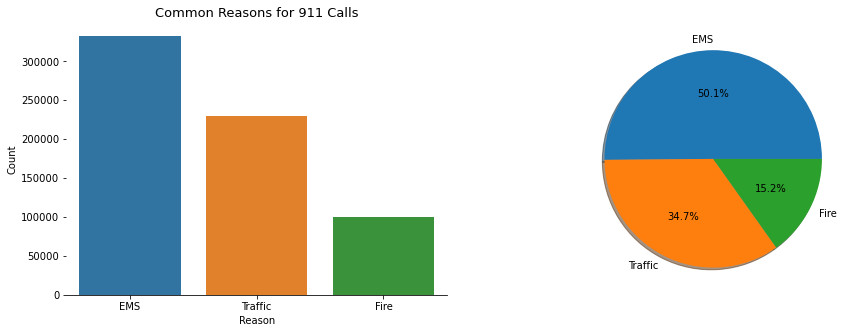

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

sns.countplot(x='reason', data=df, order=df['reason'].value_counts().index, ax=axes[0])
axes[0].set_title('Common Reasons for 911 Calls', size=13)
axes[0].set(xlabel='Reason', ylabel='Count')

df['reason'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1],shadow=True)
axes[1].set(xlabel='', ylabel='')

sns.despine(bottom=False, left=True)

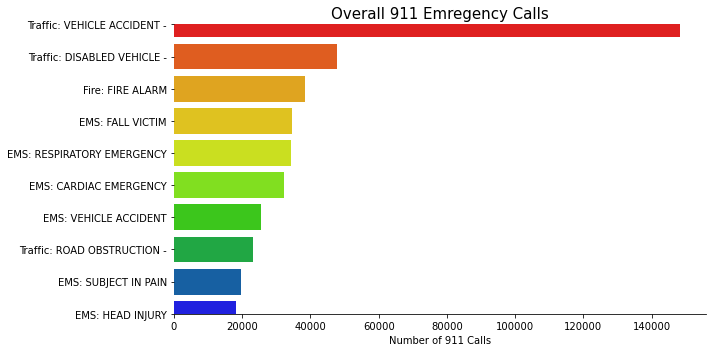

In [16]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(y='title', data=df, order=df['title'].value_counts().index, palette='prism')
sns.despine(bottom=False, left=True)
axes.set_ylim([9, 0])
axes.set_title('Overall 911 Emregency Calls', size=15)
axes.set(xlabel='Number of 911 Calls', ylabel='')
plt.tight_layout()

Text(0.5, 1.0, 'Traffic 911 Emergency Calls')

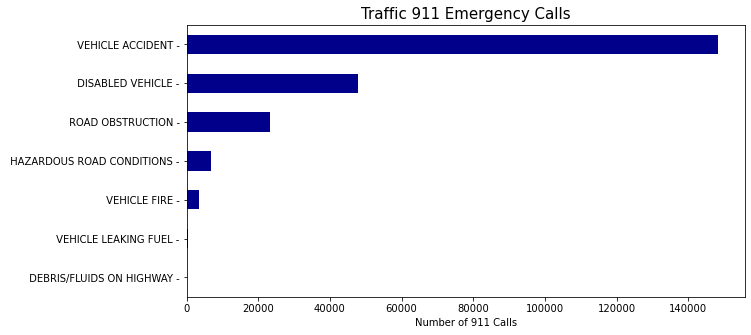

In [17]:

df[df['reason']=='Traffic'].groupby('title_code').count()['lat'].sort_values(ascending=True).plot(kind='barh', figsize=(10, 5), color='darkblue')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Traffic 911 Emergency Calls', fontsize=15)

Text(0.5, 1.0, 'Fire 911 Emergency Calls')

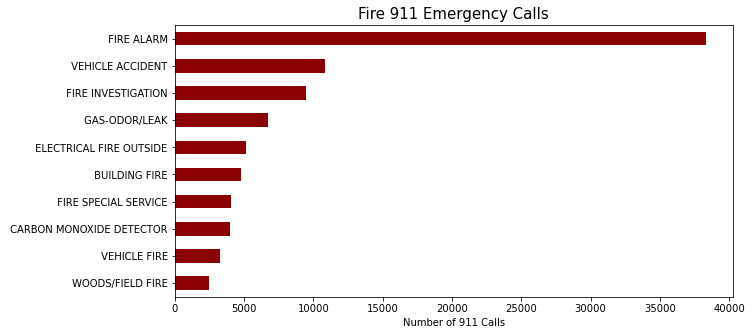

In [18]:
df[df['reason']=='Fire'].groupby('title_code').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkred')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Fire 911 Emergency Calls', fontsize=15)

Text(0.5, 1.0, 'EMS 911 Emergency Calls')

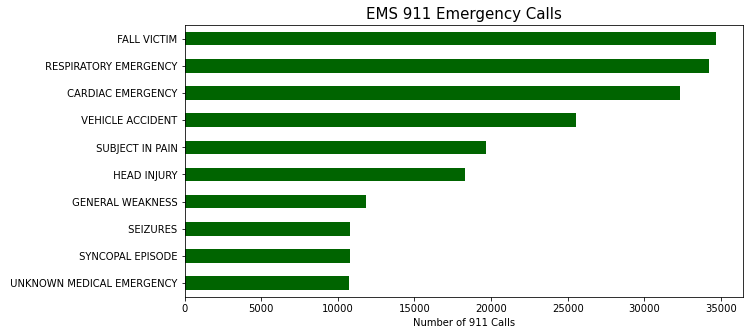

In [19]:
df[df['reason']=='EMS'].groupby('title_code').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkgreen')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('EMS 911 Emergency Calls', fontsize=15)

In [20]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [21]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

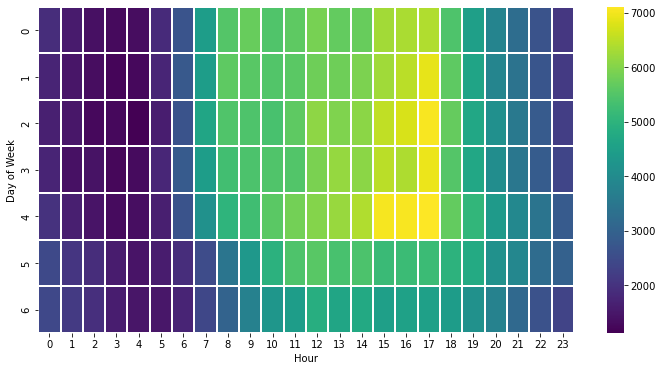

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis', linewidths=0.05)